# <span style="color:indigo">Exploring Greenhouse Gas (GHG) Emissions from Food Systems</span>

*Amanda Knudsen — Summer 2021*

### Goal 
In the notebook below, we explore **GHGs across the lifecycle of food production and consumption** through data. 

We'll take a look at sources of emissions across stages of global food systems and the production of common food products in order to identify areas with the most significant impact. Using this information, we then zoom in on multiple opportunities for sustainable alternatives, explored in the interactive dashboard version of this project on Tableau public: 
**[Low Hanging Fruit: Sustainable Food Opportunities to Combat Climate Change](https://public.tableau.com/app/profile/amanda.knudsen/viz/FoodProduction07/LowHangingFruit)**



### Context

**Contemporary consumers want to know** how the foods they eat contribute to their environmental footprint. Across the global food system, **businesses know there is value and urgency** in creating more sustainable systems with reduced GHGs. Taxes and caps on emissions, increasing temperatures, diminishing availability of land and quality of soil are increasingly a reality for **stakeholders across the food value chain**.

- *GHG emissions from human activities are the main driver of climate change and food systems are a significant contributor with one third (~34%) of total global GHG emissions from human activities coming from food systems each year, based on multiple U.N.-backed studies released in 2021. via <a href = https://news.un.org/en/story/2021/03/1086822>United Nations</a>, <a href = http://www.fao.org/news/story/en/item/1402118/icode/>FAO </a>*
- *The impacts of climate change such as increasing temperatures and changing precipitation patterns are already affecting the security of food systems and negative impacts are expected to increase based on future projected climate change, resulting in further declines of crop yields and increasingly higher food prices.  via <a href = https://www.ipcc.ch/srccl/chapter/chapter-5/> IPCC </a>*
- *As of May 2021, <a href = https://www.pewresearch.org/science/2021/05/26/climate-energy-and-environmental-policy/ps_2021-05-26_climate-and-generations_02-010/>70% of U.S. adults</a> now favor taxing corporations based on their emissions, among other proposals aimed at reducing the effects of climate change that majorities of Americans support. via <a href = https://www.pewresearch.org/science/wp-content/uploads/sites/16/2021/05/PS_2021.05.26_climate-and-generations_REPORT.pdf>Pew Research Center</a>* 



***Libraries***
<ul>
  <li> pandas as pd # to process data in a tabular format</li>
  <li> numpy as np # for linear algebra </li>
  <li> matplotlib as mpl and matplotlib.pyplot # basic plotting library</li>
  <li> matplotlib inline # so that graphs are easily included in the notebook</li>
  <li> seaborn # aesthetically pleasing plots</li>
</ul>

***Data sources***
<ul>
  <li> <a href = https://edgar.jrc.ec.europa.eu/edgar_food#data_download>EDGAR-FOOD</a> global food system GHG emissions from 1990-2015</li>

  <li> <a href = https://ourworldindata.org/environmental-impacts-of-food> Our World in Data</a> environmental impacts of foods and original source <a href = https://science.sciencemag.org/content/360/6392/987>article</a> and supplementary <a href = https://science.sciencemag.org/highwire/filestream/710905/field_highwire_adjunct_files/3/aaq0216_DataS2.xls>dataset</a> published in Science</li>

  <li> <a href = http://www.fao.org/gleam/results/en/> GLEAM</a> emissions data from Global Livestock Environmental Assessment Model (GLEAM) from the U.N. FAO</li>
  </ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import plotly.express as px
import plotly.tools as tls
import plotly.io as pio
pio.templates.default = "seaborn"
plt.style.use("seaborn")

In [2]:
df_edgar = pd.read_csv('../input/edgarfoodemissions/EDGARfood.csv')
df_foods = pd.read_csv('../input/foodproductemissions/Food_Product_Emissions.csv')
df_gleam = pd.read_csv('../input/gleamlivestockemissions/GLEAM_LivestockEmissions.csv')
# df_edgar = food system emissions from EDGAR-FOOD
# df_foods = food products global average emissions from Science and Our World in Data
# df_gleam = livestock emissions from UN-FAO

## Exploring GHG emissions in the global food system
First, we'll explore data in **EDGAR-FOOD** for the big picture of GHGs in global food systems. 

In [3]:
df_edgar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128700 entries, 0 to 128699
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Food System Stage  128700 non-null  object 
 1   FS Stage Order     128700 non-null  object 
 2   GHG                128700 non-null  object 
 3   Country            128700 non-null  object 
 4   Year               128700 non-null  int64  
 5   GHG Emissions      128700 non-null  float64
 6   Unit               128700 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 6.9+ MB


### EDGAR-FOOD overview

* GHG is short for 'Greenhouse Gas' and EDGAR-FOOD identifies 4 of the most common GHGs emitted from global food systems: **Carbon dioxide** (CO2), **Methane** (CH4), **Nitrous oxide** (N2O), and **F-gases** (Fluorinated gases)
* GHG emissions are measured for each year from **1990 to 2015** globally and for each country. The unit of measurement is **metric tons CO2e** (carbon dioxide equivalents) using GWP-100, AR5 values for all 4 GHGs measured
* GHG emissions from the food system are identified from each **food system stage**. There are **8 stages of the global food system**, Land, Farm, Processing, Transport, Packaging, Retail, Consumer, Waste
* There are 128700 rows and 7 columns in the EDGAR-FOOD dataset
* Data source <a href = https://edgar.jrc.ec.europa.eu/edgar_food#data_download>link</a>

In [4]:
df_edgar

,Food System Stage,FS Stage Order,GHG,Country,Year,GHG Emissions,Unit
0,Land,Stage 1,Methane (CH4),Afghanistan,1990,0.600,"metric tons CO2e (GWP-100, AR5)"
1,Land,Stage 1,Methane (CH4),Afghanistan,1991,0.600,"metric tons CO2e (GWP-100, AR5)"
2,Land,Stage 1,Methane (CH4),Afghanistan,1992,0.600,"metric tons CO2e (GWP-100, AR5)"
3,Land,Stage 1,Methane (CH4),Afghanistan,1993,0.600,"metric tons CO2e (GWP-100, AR5)"
4,Land,Stage 1,Methane (CH4),Afghanistan,1994,0.600,"metric tons CO2e (GWP-100, AR5)"
...,...,...,...,...,...,...,...
128695,Waste,Stage 8,Nitrous oxide (N2O),Zimbabwe,2011,113575.820,"metric tons CO2e (GWP-100, AR5)"
128696,Waste,Stage 8,Nitrous oxide (N2O),Zimbabwe,2012,114166.770,"metric tons CO2e (GWP-100, AR5)"
128697,Waste,Stage 8,Nitrous oxide (N2O),Zimbabwe,2013,115549.805,"metric tons CO2e (GWP-100, AR5)"
128698,Waste,Stage 8,Nitrous oxide (N2O),Zimbabwe,2014,114348.295,"metric tons CO2e (GWP-100, AR5)"


**At this stage of exploratory data analysis, we know:**

- CO2e is the standard unit of measure for GHG emissions
- Emissions are accounted for through 8 stages in the food system
- Emissions (CO2e) are accounted for through 4 GHGs in the food system 

We can divide the total emissions by food system stage or by GHG, but in order to accurately assess and prioritize emissions reductions we need to first understand the big picture: 
* Which GHG contributes the highest emissions across the food system in total?
* Which food system stage contributes the highest emissions in total?
* Are GHG emissions found equally in each food system stage? Are some GHGs emitted more in some stages than others?

**Next we'll identify food system emissions by stage and by type of GHG with ...
 the illustrious *Sankey diagram***

In [5]:
#grouping Food System Stage, GHG and sum of GHG emissions 
#We'll use this info to create our sankey diagrams below
edgar_sankey = df_edgar.groupby(by=
                                   ["GHG", 
                                    "FS Stage Order",
                                    "Food System Stage"]).sum()[["GHG Emissions"]]
edgar_sankey = edgar_sankey.reset_index()
#edgar_sankey2 = df_edgar.groupby(by= ["FS Stage Order", "Food System Stage","GHG"]).sum()[["GHG Emissions"]]
##same process as above for the second sankey grouping
edgar_sankey

,GHG,FS Stage Order,Food System Stage,GHG Emissions
0,Carbon dioxide (CO2),Stage 1,Land,1.638427e+11
1,Carbon dioxide (CO2),Stage 2,Farm,2.251379e+10
2,Carbon dioxide (CO2),Stage 3,Processing,1.015064e+10
3,Carbon dioxide (CO2),Stage 4,Transport,1.577650e+10
4,Carbon dioxide (CO2),Stage 5,Packaging,1.802894e+10
5,Carbon dioxide (CO2),Stage 6,Retail,6.372152e+09
6,Carbon dioxide (CO2),Stage 7,Consumer,7.211363e+09
7,Carbon dioxide (CO2),Stage 8,Waste,7.188883e+07
8,F-gases (Fluorinated),Stage 6,Retail,6.010303e+09
9,Methane (CH4),Stage 1,Land,6.087960e+08


In [6]:
fig = go.Figure(data=[go.Sankey(
    arrangement = "snap",
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "grey", width = 0.5),
      label = [
          "Carbon dioxide (CO2)", "Methane (CH4)", "Nitrous oxide (N2O)",
          "F-gases", "Land", "Farm", "Processing",
          "Transport", "Packaging", "Retail", "Consumer", "Waste"],
      color = ["#3d6493", "#95ceeb", "#308bbc", "#86aad1", "#58805b", 
               "#98c7a0", "#f36e3a", "#fba644", "#ad5849", "#d2c795", "#736a62", "#b0a08c"]),
    #to match the colors I've been working with in Tableau 
    link = dict(
      source = [0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,3], # corresponds to 4 GHGs (the 'sources')
      target = [4,5,6,7,8,9,10,11,4,5,6,7,8,9,10,11,4,5,6,7,8,9,10,11,9], # corresponds to 8 food system stages (the 'targets') 
      value  = [163842700000,22513790000,10150640000,15776500000,18028940000,6372152000,7211363000,71888830,608796000,106454800000,2908529000,1738191000,1392743000,369802500,2066795000,32380470000,8742122,38095980000,516606500,246782000,81305220,24289890,1097962000,1833595000,6010303000] #the amount per Source to Target
  ))])
fig.update_layout(
    height=580,
    title_text="GHGs to Stages: Food System Emissions, 1990-2015", 
    font_size=14)
fig.show()

* Carbon dioxide (CO2), Methane (CH4), and Nitrous oxide (N2O) emissions are found from **all eight stages** of global food systems
* Despite their ubiquity, the vast majority of CO2, CH4, and N20 emissions occur in **Land** and **Farm** 
* **F-gases** are identified in one stage only: **Retail**
* **Land** and **Farm** account for most food system emissions by stage
* **Carbon dioxide** (CO2) and **Methane** (CH4) account for the vast majority of food system emissions by GHG


In [7]:
fig = go.Figure(data=[go.Sankey(
    arrangement = "snap",
    node = dict(
      pad = 20,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = [
          "Land", "Farm", "Processing", "Transport", "Packaging", "Retail", "Consumer", "Waste", "Carbon dioxide", "Methane", "Nitrous oxide",
          "F-gases"],
      color = ["#58805b", "#98c7a0", "#f36e3a", "#fba644", "#ad5849", "#d2c795", "#736a62", "#b0a08c","#3d6493", "#95ceeb", "#308bbc", "#86aad1"]),
    link = dict(
      source = [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5,5,6,6,6,7,7,7,7], # corresponds to 8 food system stages (the 'source') 
      target = [8, 9, 10, 8, 9, 10,8, 9, 10,8, 9, 10,8, 9, 10,8, 11, 9, 10, 8, 9, 10, 8, 9, 10], #ghg types (the targets)
      value  = [1.63842659e+11, 6.08796006e+08, 8.74212200e+06, 2.25137898e+10, 1.06454795e+11,
                3.80959812e+10, 1.01506384e+10, 2.90852906e+09, 5.16606457e+08, 1.57765035e+10,
                1.73819055e+09, 2.46781984e+08, 1.80289417e+10, 1.39274312e+09, 8.13052248e+07,
                6.37215236e+09, 6.01030263e+09, 3.69802473e+08, 2.42898945e+07, 7.21136338e+09,
                2.06679458e+09, 1.09796230e+09, 7.18888257e+07, 3.23804654e+10, 1.83359537e+09] #the amount per Source to Target
  ))])
fig.update_layout(
    height=580,
    title_text="Stages to GHGs: Food System Emissions, 1990-2015", 
    font_size=14)
fig.show()

### Yearly trends in global food system emissions
Now that we've seen food system emissions from 1990 to 2015 in total, let's take a look at trends over time.
Let's take a look at food system emissions in total and then we'll look per stage and GHG.

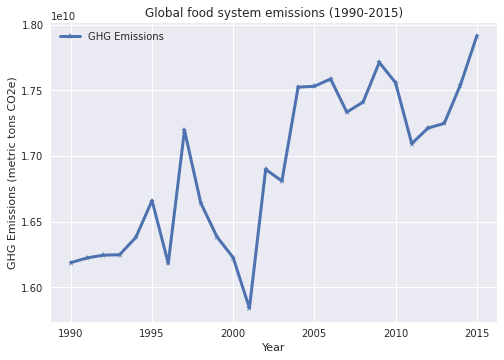

In [8]:
df_edgar_total = df_edgar.groupby(
    by=["Year"]).sum()[["GHG Emissions"]]
df_edgar_total = df_edgar_total.reset_index()
df_edgar_total = df_edgar_total.set_index(
    ["Year"])

ax = df_edgar_total.plot(
    title="Global food system emissions (1990-2015)",
    ylabel="GHG Emissions (metric tons CO2e)",
    linewidth=3, marker='*')

### Total food system GHG emissions have been growing
From 1990 to 2015, total GHG emissions were in the range of **~16 to ~18 billion metric tons of CO2e**   
Land emissions have declined while Farm emissions have grown, and annual trends for Land emissions mirror the rise and fall of carbon dioxide emissions 

In [9]:
df_edgar_stages = df_edgar.groupby(
    by=["FS Stage Order", "Food System Stage", "Year"]).sum()[["GHG Emissions"]]
df_edgar_stages = df_edgar_stages.reset_index()
# Using plotly express to visualize the GHGs emitted in each food system stage
fig = px.line(
    df_edgar_stages,
    x='Year',
    y='GHG Emissions', 
    color='Food System Stage',
    title='GHG emissions in Global Food Systems by Stage, 1990-2015')
fig.show()

df_edgar_ghgs = df_edgar.groupby(
    by=["GHG", "Year"]).sum()[["GHG Emissions"]]
df_edgar_ghgs = df_edgar_ghgs.reset_index()
# Using plotly express to visualize each GHG emissions
fig = px.line(
    df_edgar_ghgs,
    x='Year',
    y='GHG Emissions', 
    color='GHG',
    title='Global Food System Emissions by GHG, 1990-2015')
fig.show()

### Do any food products create higher emissions than others? 
Let's look at a dataset of the global average emissions for some common food products to find out. 

In [10]:
df_foods.info()
print(df_foods.columns)
df_foods.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Food product                               43 non-null     object 
 1   Land Use Change                            43 non-null     float64
 2   Feed                                       43 non-null     float64
 3   Farm                                       43 non-null     float64
 4   Processing                                 43 non-null     float64
 5   Transport                                  43 non-null     float64
 6   Packaging                                  43 non-null     float64
 7   Retail                                     43 non-null     float64
 8   Total from Land to Retail                  43 non-null     float64
 9   Total Global Average GHG Emissions per kg  43 non-null     float64
 10  Unit of GHG Emissions       

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg,Unit of GHG Emissions
0,Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.357,0.43,kg CO2e per kg food produced
1,Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.678,0.86,kg CO2e per kg food produced
2,Barley,0.009,0.000,0.176,0.128,0.035,0.497,0.264,1.109,1.18,kg CO2e per kg food produced
3,Beef (beef herd),16.278,1.878,39.388,1.269,0.346,0.247,0.164,59.570,99.48,kg CO2e per kg food produced
4,Beef (dairy herd),0.906,2.508,15.689,1.108,0.424,0.268,0.182,21.085,33.30,kg CO2e per kg food produced


*Expand or condense any cells throughout this notebook to explore my code!*

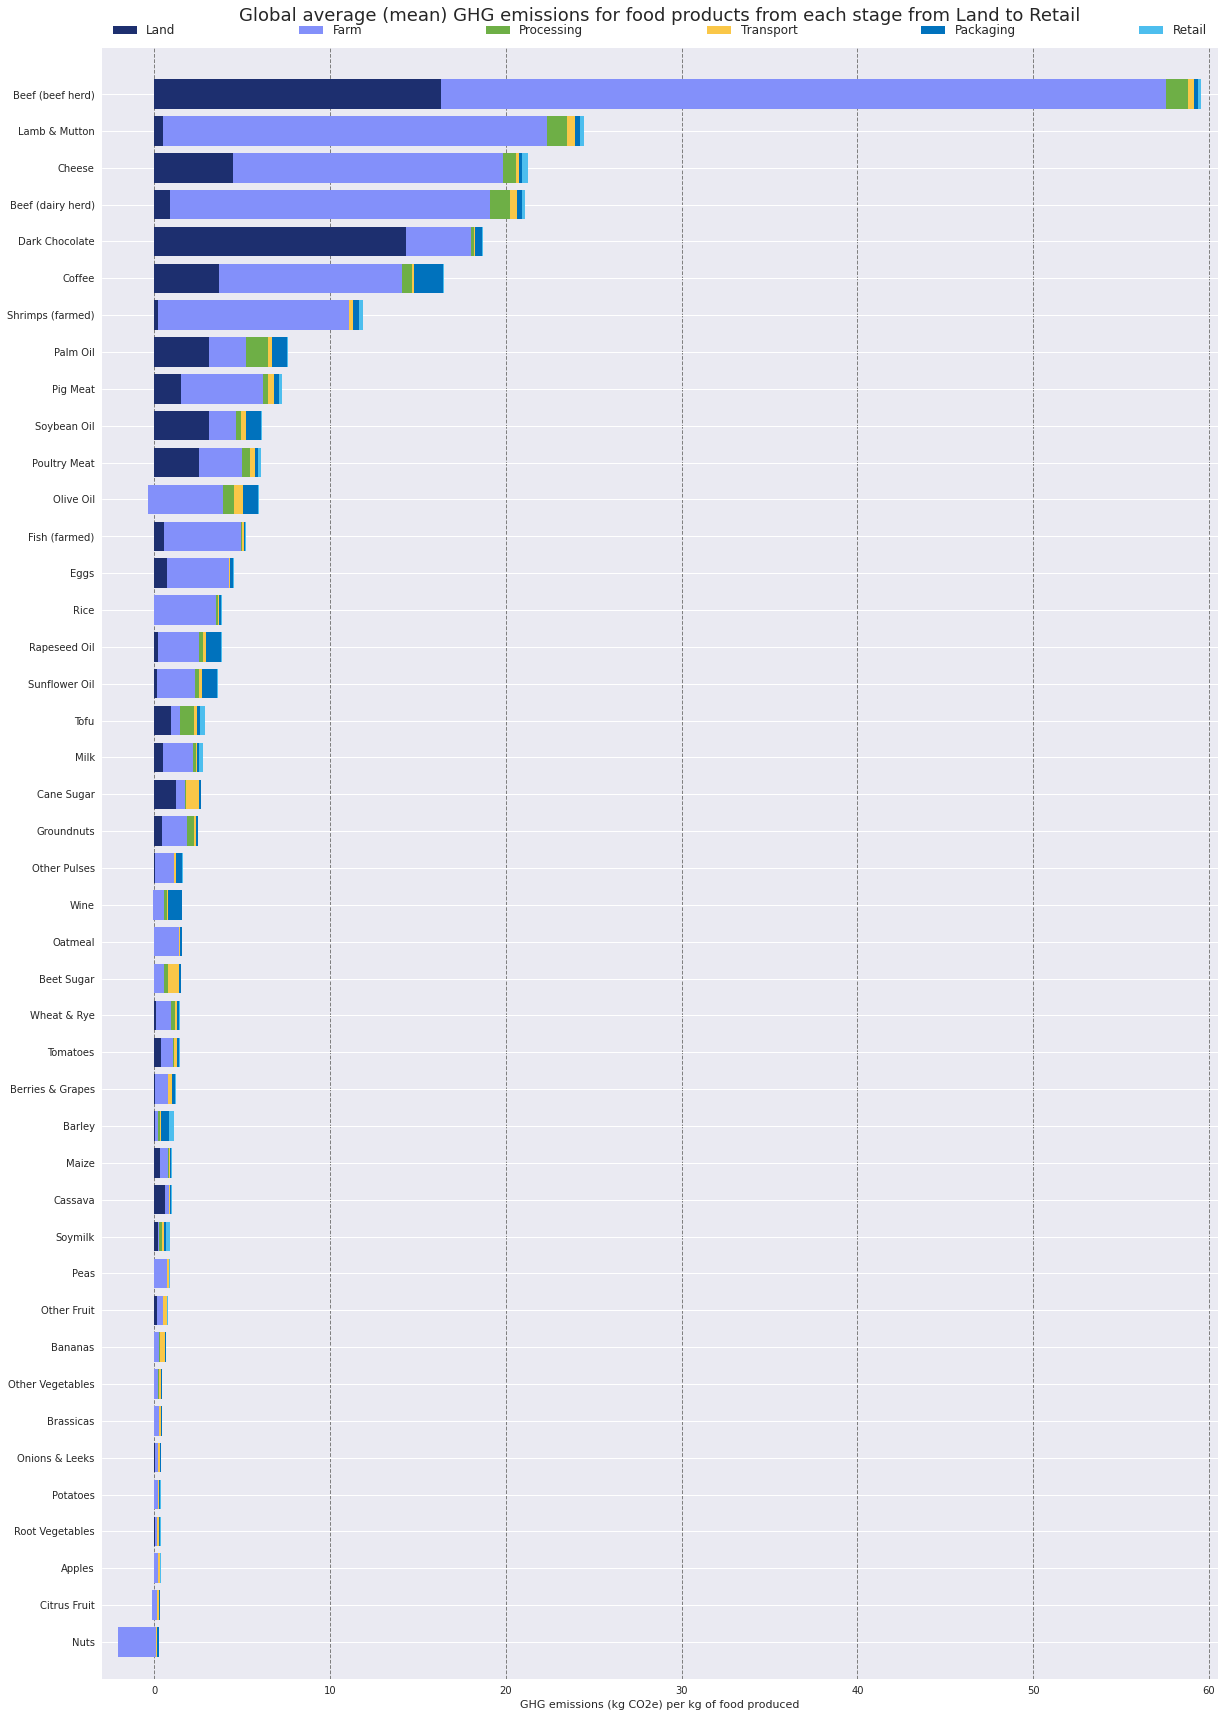

In [11]:
df_foods_sc = df_foods[['Food product', 'Land Use Change', 'Feed', 
                            'Farm', 'Processing', 'Transport', 'Packaging', 
                            'Retail', 'Total from Land to Retail']
                               ].sort_values(by='Total from Land to Retail', ascending= True)
df_foods_sc['Farm and Feed'] = df_foods_sc['Farm'] + df_foods_sc['Feed']
# Farm and Feed are aggregated in other datasets, adding here for consistency 
# df_foods_sc = df_foods_sc.drop(['Total from Land to Retail', 'Farm', 'Feed'], axis=1)
df_foods_sc = df_foods_sc.rename(columns= {'Land Use Change': 'Land' })
df_foods_sc = df_foods_sc.reset_index()
df_foods_sc = df_foods_sc.set_index(['Food product'])

## stacked bar chart test
fields = ['Land','Farm and Feed','Processing','Transport','Packaging','Retail']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', '#0072BD','#4DBEEE']
labels = ['Land', 'Farm', 'Processing', 'Transport','Packaging','Retail']

# figure and axis
fig, ax = plt.subplots(1, figsize=(20, 30))

# plot bars
left = len(df_foods_sc) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_foods_sc.index, df_foods_sc[name], left = left, color=colors[idx])
    left = left + df_foods_sc[name]

# title, legend, labels
plt.title('Global average (mean) GHG emissions for food products from each stage from Land to Retail\n', fontsize=18)
plt.legend(labels, bbox_to_anchor=([0., 1., 1., .102]), loc='lower left', fontsize=12,
           ncol=6,  mode="expand", frameon=False)
plt.yticks(df_foods_sc.index)
plt.xlabel('GHG emissions (kg CO2e) per kg of food produced')
# plt.ylabel(df_foods_sc.index)

# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# adjust limits and draw grid lines
plt.xlim(-3, ax.get_xticks()[-1] + -9.5)
plt.ylim(-1, ax.get_yticks()[-1] + 1.25)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

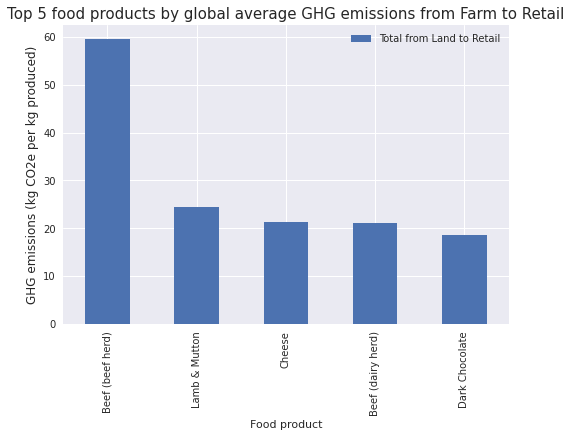

In [12]:
df_foodstop = df_foods[
    ['Food product', 'Total from Land to Retail']
].sort_values(by='Total from Land to Retail', ascending=False)
df_foodstop = df_foodstop.set_index('Food product')
df_foodstop = df_foodstop.head(5)

df_foodstop.plot(kind='bar')
plt.ylabel('GHG emissions (kg CO2e per kg produced)', fontsize=12)
plt.title('Top 5 food products by global average GHG emissions from Farm to Retail', fontsize=15)
plt.show()

### Similar to trends in top GHGs by food system stage on a global scale, Farm and Land are the highest stages for most food products
- **Animal sourced food products** tend to have higher emissions than **food products sourced from plants** across all stages of food production  (4 of the top 5 in total are foods sourced from animals)
- Food products sourced from **ruminants**, which includes **cattle** and **sheep**, account for significantly higher emissions across all stages, particularly in **land** and **farm** stages (* Cattle (beef) is in the top spot at more than double the average GHGs from producing 1 kg of Lamb & Mutton)
- Some plant-sourced products like **coffee** and **chocolate** have higher emissions than some animal products like **poultry**, primarily related to the high average emissions for coffee and chocolate from the **land** stage and **farm** stage often related to heavy fertilizer use and land clearing practices
- The land stage tends to be higher for food products from larger animals like cattle due to common occurence of land degredation and deforestation for production of feed like soy and land-clearing for production systems that are based on pasture-grazing 
- The land stage can be negative for some plant-sourced products like Nuts, due to the production process providing an emissions "sink" that can sequester carbon, but the land stage can be high for other plant products like **chocolate**, due to production practices like deforestation 
- The farm stage can be high even for plant products, especially when those products use intensive fertilizers like for coffee

### Now that we see trends emerging for food products overall, we'll dive into differences among the same food products in different production systems and commodity types 

We'll specifically focus on **Cattle and chicken** global GHG emissions from the U.N. GLEAM dataset.

In [13]:
list(df_gleam.columns)
df_gleam.info()
df_gleam.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 22 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Region                                           583 non-null    object 
 1   Animal species                                   583 non-null    object 
 2   Production system                                583 non-null    object 
 3   Commodity                                        583 non-null    object 
 4   Emission Intensity (kg CO2e per kg protein)      583 non-null    float64
 5   Production (kg protein)                          543 non-null    float64
 6   Total GHG emissions (kg CO2e)                    543 non-null    float64
 7   Total CO2 emissions (kg CO2e)                    543 non-null    float64
 8   Total CH4 emissions (kg CO2e)                    543 non-null    float64
 9   Total N2O emissions (kg CO2e)   

,Region,Animal species,Production system,Commodity,Emission Intensity (kg CO2e per kg protein),Production (kg protein),Total GHG emissions (kg CO2e),Total CO2 emissions (kg CO2e),Total CH4 emissions (kg CO2e),Total N2O emissions (kg CO2e),...,"Feed: fertilizer & crop residues, N2O (kg CO2e)","Feed: applied & deposited manure, N2O (kg CO2e)","LUC: soy & palm, CO2 (kg CO2e)","LUC: pasture expansion, CO2 (kg CO2e)","Enteric fermentation, CH4 (kg CO2e)","Manure management, CH4 (kg CO2e)","Manure management, N2O (kg CO2e)","Direct energy, CO2 (kg CO2e)","Indirect energy, CO2 (kg CO2e)","Postfarm, CO2 (kg CO2e)"
0,Global,Cattle,Aggregated,Aggregated,160.3,2.916310e+10,4.674630e+12,9.449299e+11,2.648727e+12,1.080973e+12,...,1.740732e+11,7.419864e+11,4.687954e+10,3.870062e+11,2.509275e+12,1.394522e+11,1.649130e+11,4.215542e+10,1.585653e+10,9.955932e+10
1,Global,Cattle,Aggregated,Milk,86.7,1.888089e+10,1.637519e+12,2.756914e+11,9.676442e+11,3.941834e+11,...,7.166208e+10,2.543885e+11,1.497421e+10,NaN,8.856352e+11,8.200906e+10,6.813278e+10,2.993485e+10,3.252889e+09,8.929544e+10
2,Global,Cattle,Aggregated,Meat,295.4,1.028222e+10,3.037111e+12,6.692385e+11,1.681083e+12,6.867892e+11,...,1.024111e+11,4.875979e+11,3.190534e+10,3.870062e+11,1.623640e+12,5.744310e+10,9.678019e+10,1.222057e+10,1.260364e+10,1.026388e+10
3,Global,Cattle,Grassland systems,Aggregated,206.3,1.033817e+10,2.133054e+12,5.628062e+11,1.052965e+12,5.172829e+11,...,5.253660e+10,4.267612e+11,8.194330e+09,3.870062e+11,9.969096e+11,5.605552e+10,3.798508e+10,1.417326e+10,4.303272e+09,3.773092e+10
4,Global,Cattle,Grassland systems,Milk,95.0,6.940654e+09,6.592844e+11,9.286140e+10,3.713461e+11,1.950770e+11,...,2.156126e+10,1.587838e+11,2.412100e+09,NaN,3.369018e+11,3.444428e+10,1.473188e+10,1.078605e+10,9.998435e+08,3.462338e+10


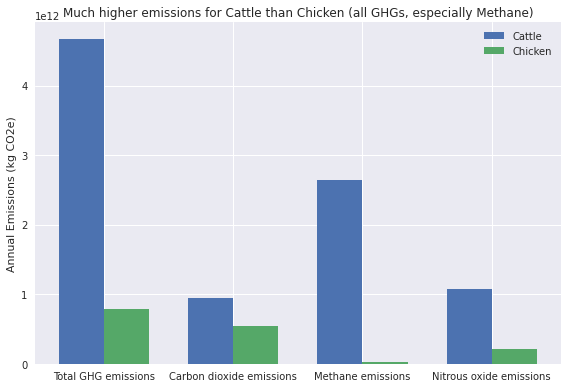

In [14]:
#select columns we need and filter for global, filter out 'aggregated' rows (duplicates) 
df_gleamglobal = df_gleam[
    ['Region', 'Animal species', 'Production system', 'Commodity', 
     'Emission Intensity (kg CO2e per kg protein)', 'Production (kg protein)', 
     'Total GHG emissions (kg CO2e)', 'Total CO2 emissions (kg CO2e)', 
     'Total CH4 emissions (kg CO2e)', 'Total N2O emissions (kg CO2e)']].loc[
    (df_gleam['Region']=='Global') & 
    (df_gleam['Production system']!= 'Aggregated') & 
    (df_gleam['Commodity']!= 'Aggregated')]

# now we'll filter out just the animals of interest
df_gleamglobal = df_gleamglobal[df_gleamglobal['Animal species'].isin(['Cattle', 'Chicken'])]
df_gleamglobal = df_gleamglobal.reset_index()

df_group1 = df_gleamglobal.groupby(
    by=['Animal species']).sum()[['Total GHG emissions (kg CO2e)','Total CO2 emissions (kg CO2e)',
                                  'Total CH4 emissions (kg CO2e)','Total N2O emissions (kg CO2e)',]]
df_group1 = df_group1.reset_index()

labels = ['Total GHG emissions', 'Carbon dioxide emissions', 'Methane emissions', 'Nitrous oxide emissions']
cattle_totals = [4.674630e+12, 9.449299e+11, 2.648727e+12, 1.080973e+12]
chicken_totals = [7.897593e+11, 5.487263e+11, 2.421301e+10, 2.168199e+11]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, cattle_totals, width, label='Cattle')
rects2 = ax.bar(x + width/2, chicken_totals, width, label='Chicken')

ax.set_ylabel('Annual Emissions (kg CO2e)')
ax.set_title('Much higher emissions for Cattle than Chicken (all GHGs, especially Methane)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

*Context on filtering out 'aggregated' rows:  aggregated values in either production system or commodity are duplicates. Example using the below*:
- A) *Animal species: Cattle*, *Production system: Grassland systems*, *Commodity: Aggregated* 
- B) *Animal species: Cattle*, *Production system: Grassland systems*, *Commodity: Milk*  
- C) *Animal species: Cattle*, *Production system: Grassland systems*, *Commodity: Meat*

*The value of A in the emission intensity column is the average of B and C. 
The value of all other columns is the aggregate value of B and C.*
*Anything that's identified as an 'Aggregate' production system or commodity is literally an aggregate, so they'd only represent duplicate data for our purposes.*

Cattle meat production creates higher emissions from grassland systems and overall, as it contributes the highest level of emissions of any food product seen here and across other measures and food system stages. This and other sources of data help illuminate areas for producers to reduce emissions through different production systems.

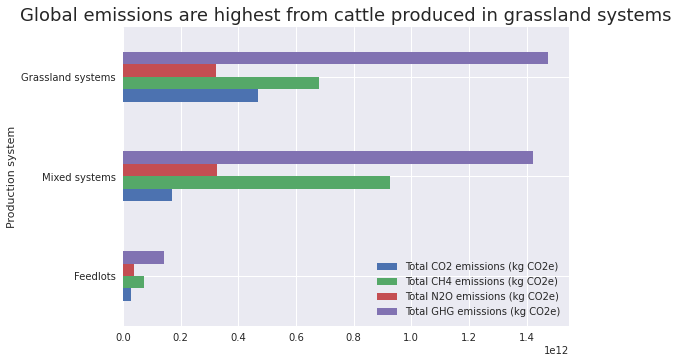

In [15]:
df_gleamcattle = df_gleam[df_gleam['Animal species'].isin(['Cattle'])]
df_gleamcattle_agg = df_gleamcattle.loc[
    (df_gleamcattle['Production system']== 'Aggregated') & 
    (df_gleamcattle['Commodity']== 'Aggregated')]
df_gleamcattle_agg = df_gleamcattle_agg.drop(['Animal species','Production system',
                                              'Commodity','Feed, CH4 (kg CO2e)'], axis=1)

emissions_prod = df_gleamglobal[['Animal species', 'Production system', 'Commodity', 
                                      'Total CO2 emissions (kg CO2e)', 'Total CH4 emissions (kg CO2e)', 
                           'Total N2O emissions (kg CO2e)', 'Total GHG emissions (kg CO2e)']].loc[
    (df_gleamglobal['Animal species']== 'Cattle') & (df_gleamglobal['Commodity']== 'Meat')].set_index(
    'Production system').sort_values(by='Total GHG emissions (kg CO2e)', ascending=True).plot(kind='barh')
plt.title('Global emissions are highest from cattle produced in grassland systems', fontsize=18)
plt.show()

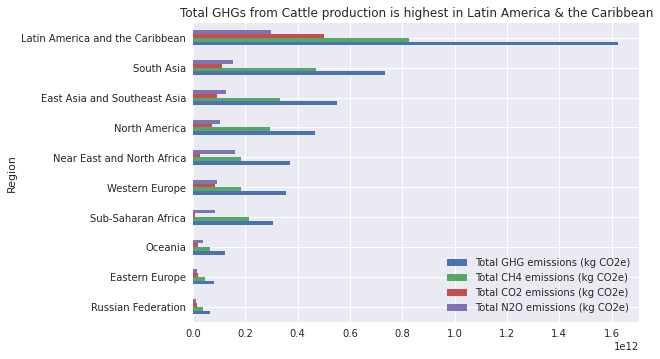

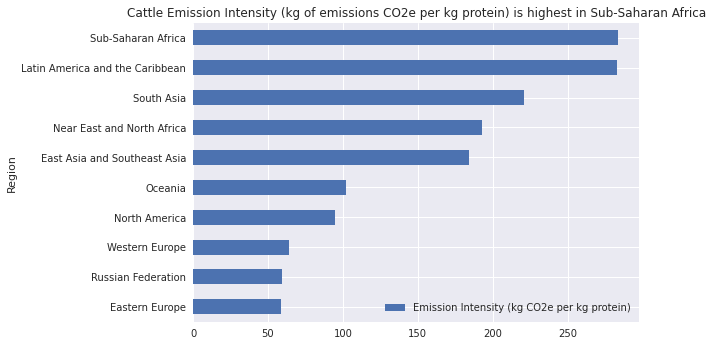

In [16]:
df_gleamcattle_aggT = df_gleamcattle_agg[['Region', 'Total GHG emissions (kg CO2e)', 'Total CH4 emissions (kg CO2e)', 
                                          'Total CO2 emissions (kg CO2e)', 'Total N2O emissions (kg CO2e)']].loc[
    (df_gleamcattle_agg['Region']!= 'Global')].set_index('Region').sort_values(
    by= 'Total GHG emissions (kg CO2e)', ascending=True).plot(kind='barh')
plt.title('Total GHGs from Cattle production is highest in Latin America & the Caribbean',fontsize=12)
plt.show()

df_gleamcattleT = df_gleamcattle_agg[['Region', 'Emission Intensity (kg CO2e per kg protein)']].loc[
    (df_gleamcattle_agg['Region']!= 'Global')].set_index('Region').sort_values(
    by= 'Emission Intensity (kg CO2e per kg protein)', ascending=True).plot(kind='barh')
plt.title('Cattle Emission Intensity (kg of emissions CO2e per kg protein) is highest in Sub-Saharan Africa',fontsize=12)
plt.show()

*To interact with the data and discover more insights, head over to my project on Tableau public:*
## [Low Hanging Fruit: Sustainable food opportunities to combat climate change](https://public.tableau.com/app/profile/amanda.knudsen/viz/FoodProduction07/LowHangingFruit)